In [1]:
import numpy as np

from bird_diversity.data_io import read_bird_counts, read_foliage_density
from bird_diversity.entropy import entropy
from bird_diversity.plotting import scatter

bird_file = "../data/bird_census.csv"
foliage_file = "../data/foliage_density.csv"


In [2]:
bird_df = read_bird_counts(bird_file)

In [3]:
bsd = {}
for site in bird_df:
    bird_prob = np.asarray(bird_df[site])
    bsd[site] = entropy(bird_prob, base="e")

/Users/bryna/Projects/teaching/bird_diversity/src/bird_diversity/entropy.py:40: RuntimeWarning: divide by zero encountered in log
  items = probabilities * np.log(probabilities)
/Users/bryna/Projects/teaching/bird_diversity/src/bird_diversity/entropy.py:40: RuntimeWarning: invalid value encountered in multiply
  items = probabilities * np.log(probabilities)


In [4]:
bsd

{'A': np.float64(0.6365141682948128),
 'B': np.float64(1.2636544318820964),
 'C': np.float64(2.265033074137199),
 'E': np.float64(1.5351088683870757),
 'F': np.float64(2.3979365438640974),
 'G': np.float64(1.676987774322417),
 'H': np.float64(2.6303014069632353),
 'I': np.float64(1.3321790402101223),
 'J': np.float64(2.2888683945513755),
 'K': np.float64(2.213691873536435),
 'L': np.float64(2.1333819302645445),
 'M': np.float64(2.6960729233316076)}

In [5]:
paper_bsd = {
    "A": .639,
    "B": 1.266,
    "C": 2.265,
    "E": 1.712,
    "F": 2.403,
    "G": 1.712,
    "H": 2.749,
    "I": 1.332,
    "J": 2.285,
    "K": 2.277,
    "L": 2.127,
    "M": 2.567,
}

In [6]:
for site in bsd:
    diff = bsd[site] - paper_bsd[site]
    if abs(diff) > 2e-3:
        print(f"site {site}: {diff}")


site A: -0.002485831705187236
site B: -0.0023455681179036514
site E: -0.17689113161292425
site F: -0.005063456135902644
site G: -0.03501222567758289
site H: -0.11869859303676478
site J: 0.0038683945513753315
site K: -0.0633081264635651
site L: 0.0063819302645447
site M: 0.12907292333160747


In [7]:
foliage_df = read_foliage_density(foliage_file)

In [8]:
fdh = {}
for site in foliage_df:
    foliage_prob = np.asarray(bird_df[site])
    fdh[site] = entropy(foliage_prob, base="e")

/Users/bryna/Projects/teaching/bird_diversity/src/bird_diversity/entropy.py:40: RuntimeWarning: divide by zero encountered in log
  items = probabilities * np.log(probabilities)
/Users/bryna/Projects/teaching/bird_diversity/src/bird_diversity/entropy.py:40: RuntimeWarning: invalid value encountered in multiply
  items = probabilities * np.log(probabilities)


In [9]:
fdh

{'A': np.float64(0.6365141682948128),
 'B': np.float64(1.2636544318820964),
 'C': np.float64(2.265033074137199),
 'E': np.float64(1.5351088683870757),
 'F': np.float64(2.3979365438640974),
 'G': np.float64(1.676987774322417),
 'H': np.float64(2.6303014069632353),
 'I': np.float64(1.3321790402101223),
 'J': np.float64(2.2888683945513755),
 'K': np.float64(2.213691873536435),
 'L': np.float64(2.1333819302645445),
 'M': np.float64(2.6960729233316076)}

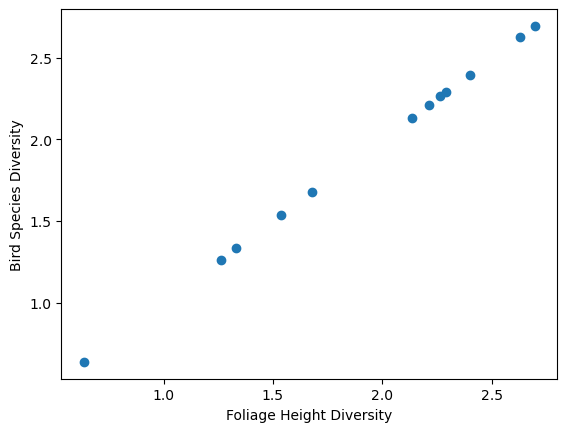

In [10]:
scatter(
    fdh.values(),
    bsd.values(),
    xlabel="Foliage Height Diversity",
    ylabel="Bird Species Diversity"
)

